In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = "serif"
import warnings
warnings.filterwarnings('ignore')

In [2]:
chicago = gp.read_file('processed_data/chicago_data_v03.shp')
chicago

,geoid10,commarea,commarea_n,H_a,H_amin,TOTAL POPU,crime_coun,is_violent,tract_area,pct_park,...,existing_i,COMMUNITY,PERCENT OF,PERCENT HO,PERCENT AG,PER CAPITA,HARDSHIP I,PERCENT_CA,EBF_PFS,geometry
0,17031842400,44,44.0,0.691932,2.513031,3304,731,310,1.968638,0.028370,...,2.0,Chatham,3.3,27.8,40.3,18881,60.0,0.207434,0.88,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.257077,0.72,"POLYGON ((-87.61235 41.74568, -87.61234 41.745..."
2,17031440201,44,44.0,0.691932,2.513031,5060,673,318,0.531537,0.000000,...,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.257077,0.72,"POLYGON ((-87.61235 41.74568, -87.61234 41.745..."
3,17031440202,44,44.0,0.691932,2.513031,2999,383,152,0.781699,0.033547,...,5.0,Chatham,3.3,27.8,40.3,18881,60.0,0.371764,0.73,"POLYGON ((-87.60852 41.73660, -87.60875 41.736..."
4,17031440102,44,44.0,0.691932,2.513031,3127,547,241,0.627504,0.000000,...,0.0,Chatham,3.3,27.8,40.3,18881,60.0,0.350394,0.84,"POLYGON ((-87.59956 41.74540, -87.59890 41.745..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,17031120200,12,12.0,-0.996737,0.824363,4430,66,17,2.392156,0.020754,...,4.0,Forest Glen,1.1,7.5,40.5,44164,11.0,0.680456,0.10,"POLYGON ((-87.74884 41.98364, -87.74906 41.983..."
842,17031620300,62,62.0,0.580884,2.401983,6399,184,57,0.992183,0.050583,...,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.219484,0.56,"POLYGON ((-87.72310 41.79094, -87.72309 41.790..."
843,17031620400,62,62.0,0.580884,2.401983,5198,120,55,0.656283,0.006880,...,3.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.191066,0.66,"POLYGON ((-87.71312 41.78609, -87.71326 41.786..."
844,17031620100,62,62.0,0.580884,2.401983,4289,170,50,0.837580,0.000000,...,1.0,West Elsdon,11.1,15.6,37.7,15754,69.0,0.195949,0.52,"POLYGON ((-87.71347 41.79565, -87.71347 41.795..."


In [3]:
chicago.columns

Index(['geoid10', 'commarea', 'commarea_n', 'H_a', 'H_amin', 'TOTAL POPU',
       'crime_coun', 'is_violent', 'tract_area', 'pct_park', 'n_churches',
       'n_public', 'n_private', 'n_librarie', 'percent_qu', 'number_of_',
       'kw_total', 'existing_i', 'COMMUNITY', 'PERCENT OF', 'PERCENT HO',
       'PERCENT AG', 'PER CAPITA', 'HARDSHIP I', 'PERCENT_CA', 'EBF_PFS',
       'geometry'],
      dtype='object')

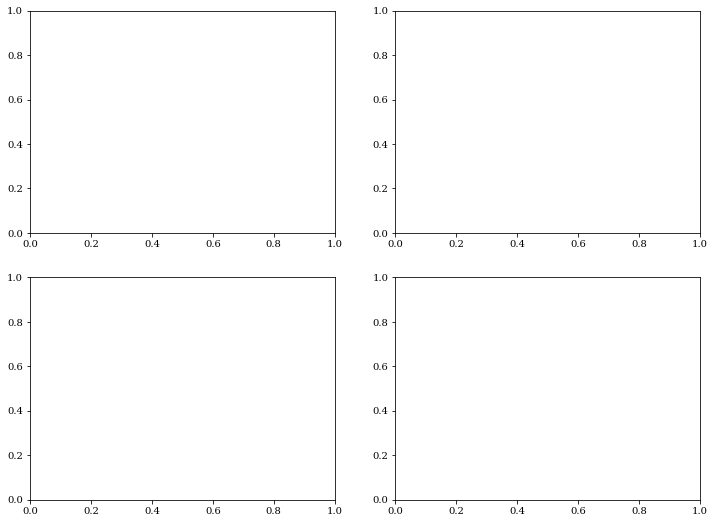

In [4]:
fig, axs = plt.subplot_mosaic([['a)', 'b)'],['c)', 'd)']], const)

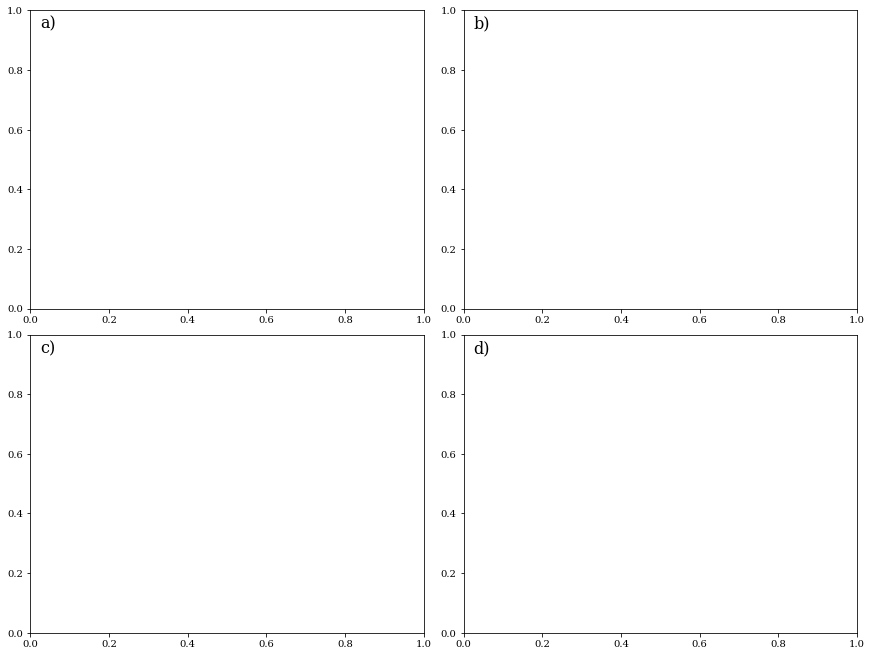

In [9]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

fig, axs = plt.subplot_mosaic([['a)', 'b)'],['c)', 'd)']],
                              constrained_layout=True)

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize=16, verticalalignment='top',
            bbox=dict(facecolor='1', edgecolor='none', pad=3.0))

    
import matplotlib.colors as colors
# fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=1)
cmap = 'cividis'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, edgecolor='k',column='EBF_PFS', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Percentile', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Energy Burden \n Census Tract', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/energy_burden.eps', format='eps')

plt.show()